# Use Word2Vec to convert words into vectors  

In [ ]:
# https://medium.com/swlh/sentiment-classification-using-word-embeddings-word2vec-aedf28fbb8ca

In [88]:
import os
import numpy as np
import pandas as pd
import keras

import gensim
import gensim.downloader as api
from gensim.models import KeyedVectors
import IPython as ipd
from IPython.display import display, HTML # For displaying tables

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from gensim.parsing.preprocessing import remove_stopwords
from gensim.utils import simple_preprocess

import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

#from gensim.test.utils import datapath
#from gensim.test.utils import lee_corpus_list
#from gensim.models import Word2Vec

In [89]:
path = '/home/marrakchi/TFM/TFM_env/Datasets/'
OUTPUT_FOLDER = '/home/marrakchi/TFM/TFM_env/Datasets/word2vec/'

In [6]:
"""
# English pretrained keyedVectors inside gensim
wv_from_text = KeyedVectors.load_word2vec_format(datapath('word2vec_pre_kv_c'), binary=False)  # C text format
vector = wv_from_text['yes']  # numpy vector of a word
print(vector)

# Another english pretrained word-vectors from gensim-data with longer vectors (100,)
word_vectors = api.load("glove-wiki-gigaword-100")
vector = word_vectors['yes']  # numpy vector of a word
print(vector)
"""

[-0.131775 -0.374512  0.298094 -0.258061  0.209376  0.22397   0.391901
 -0.137479 -0.067267 -0.318337]
[-0.050131   0.66356    0.84315   -0.75295   -0.42848    0.161
 -0.03673    0.074777   0.35251   -0.28556    0.20641   -0.043102
 -0.37978   -0.052587   0.29311   -0.45879   -0.47363    0.20305
 -0.45185    0.81729    0.16955    0.55388   -0.56667   -0.6804
  0.10162    0.43306   -0.041035  -0.33196    0.39855   -0.42924
  0.16037    0.67055    0.56775   -0.036795   0.36762    0.20562
  0.48372   -0.0023657  0.30896   -0.55975   -0.093893   0.045387
  0.13003   -0.47783   -0.62755   -0.92217    0.034079  -0.23645
 -0.7976    -1.0137     0.11884    0.051346   0.18324    0.44278
 -0.47314   -1.5531     0.56763    0.63797    0.64317    0.21479
 -0.20058    0.28966   -0.66742   -0.7743     0.70983    0.25972
  0.4592     0.27178   -0.57331   -0.072424   0.36847    0.46355
 -0.018428  -0.41952    0.13414    0.33214   -0.033299   0.10074
 -0.43861   -0.37786    0.3342    -0.66378    0.20946

In [90]:
# Spanish keyedVectors
textfilename = path+'word2vec/'+'SBW-vectors-300-min5.txt'
wv_from_text = KeyedVectors.load_word2vec_format(textfilename, binary=False)

In [91]:
wv_from_text.most_similar(positive=['pais'])

[('paises', 0.6614495515823364),
 ('institucion', 0.6388170123100281),
 ('asi', 0.6354365944862366),
 ('razon', 0.6199750304222107),
 ('esum', 0.6054493188858032),
 ('segun', 0.5989443063735962),
 ('ocasion', 0.5985567569732666),
 ('ademas', 0.594977080821991),
 ('peticion', 0.5911797285079956),
 ('obligacion', 0.5911176204681396)]

# Use the vectors to train a SER clasifier

In [92]:
### Data processing
path_data = '/home/marrakchi/TFM/TFM_env/Datasets/EmoFilm/train_sat/decode_5grams/hyp_words.txt'
data = pd.read_csv(path_data, header = None, names = ["file"])
data[['file','words']] = data.file.str.split(n=1, expand=True)

"""
# Function to map numbers to emotions
def map_sentiment(filename):
    if filename[2:5] == 'ans':
        return 1
    elif filename[2:5] == 'dis':
        return 2
    elif filename[2:5] == 'gio':
        return 3
    elif filename[2:5] == 'rab':
        return 4
    else:
        return 5
"""
# Function to map numbers to emotions
def map_sentiment(filename):
    if filename[2:5] == 'ans':
        return 'Fear'
    elif filename[2:5] == 'dis':
        return 'Disgust'
    elif filename[2:5] == 'gio':
        return 'Happiness'
    elif filename[2:5] == 'rab':
        return 'Anger'
    else:
        return 'Sadness'

# Create emotion label
data['emotion'] = [ map_sentiment(x) for x in data['file']]

#Display
display(HTML(data[:10].to_html()))

,file,words,emotion
0,f_ans001aes,no no se impacienta,Fear
1,f_ans002aes,lo siento designios,Fear
2,f_ans003aes,es como si ese un presentimiento reses apetito,Fear
3,f_ans004aes,el activos,Fear
4,f_ans007aes,llegaban otras llegaba mujeres constantemente si que,Fear
5,f_ans009aes,no esta envolviendo vulgar y,Fear
6,f_ans009bes,me deje de alegria,Fear
7,f_ans010aes,no hay lo del abundante libertar,Fear
8,f_ans010bes,tuve el honor,Fear
9,f_ans012aes,a favorable dime que pasado,Fear


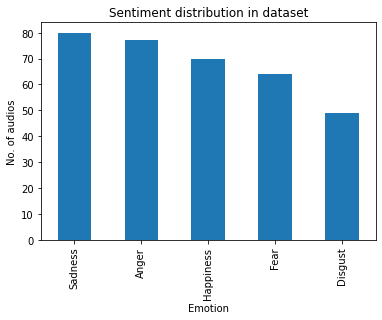

In [93]:
# Plotting the emotion distribution
plt.figure()
pd.value_counts(data['emotion']).plot.bar(title="Sentiment distribution in dataset")
plt.xlabel("Emotion")
plt.ylabel("No. of audios")
plt.show()

In [5]:
# Is it useful to remove stop words?
#print(remove_stopwords(data["words"]))
for row in data["words"]:
    print(remove_stopwords(row))
    print(row)
    print("----------------------")

se impacienta
no no se impacienta
----------------------
lo siento designios
lo siento designios
----------------------
es como si ese presentimiento reses apetito
es como si ese un presentimiento reses apetito
----------------------
el activos
el activos
----------------------
llegaban otras llegaba mujeres constantemente si que
llegaban otras llegaba mujeres constantemente si que
----------------------
esta envolviendo vulgar y
no esta envolviendo vulgar y
----------------------
deje alegria
me deje de alegria
----------------------
hay lo del abundante libertar
no hay lo del abundante libertar
----------------------
tuve el honor
tuve el honor
----------------------
favorable dime que pasado
a favorable dime que pasado
----------------------
estoy
no estoy
----------------------
puedo decir lo que habia garibaldi
no puedo decir lo que habia garibaldi
----------------------
quien es este
quien es este
----------------------
y el y se sentaban o se
y el y se sentaban o se
------------

In [94]:
# Perform tokenization

# Tokenize the text column to get the new column 'tokenized_text'
data['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in data['words']] 
print(data['tokenized_text'].head(10))

0                             [no, no, se, impacienta]
1                              [lo, siento, designios]
2    [es, como, si, ese, un, presentimiento, reses,...
3                                        [el, activos]
4    [llegaban, otras, llegaba, mujeres, constantem...
5                      [no, esta, envolviendo, vulgar]
6                              [me, deje, de, alegria]
7              [no, hay, lo, del, abundante, libertar]
8                                    [tuve, el, honor]
9                       [favorable, dime, que, pasado]
Name: tokenized_text, dtype: object


In [82]:
"""from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
data['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in data['tokenized_text'] ]
data['stemmed_tokens'].head(10)
"""

"from gensim.parsing.porter import PorterStemmer\nporter_stemmer = PorterStemmer()\n# Get the stemmed_tokens\ndata['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in data['tokenized_text'] ]\ndata['stemmed_tokens'].head(10)\n"

In [95]:
# Train Test Split Function
def split_train_test(data, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(data[['file', 'words', 'tokenized_text']], 
                                                        data['emotion'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(data)

Value counts for Train sentiments
Anger        54
Sadness      53
Happiness    50
Fear         46
Disgust      35
Name: emotion, dtype: int64
Value counts for Test sentiments
Sadness      27
Anger        23
Happiness    20
Fear         18
Disgust      14
Name: emotion, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index         file                                              words  \
0    100  f_rab015aes           buenos pasito a quien esta treta para ti   
1     30  f_ans902ces  de ojos establos estaban en tanto elocuente di...   
2    217  m_gio003aes                         apenas se le vi esta noche   
3    111  f_rab068aes          no quiero decir por fuera cambia portento   
4    308  m_tri008aes                           los llevamos el tormento   

                                      tokenized_text  
0     [buenos, pasito, quien, esta, treta, para, ti]  
1  [de, ojos, establos, estaban, en, tanto, elocu...  
2                  [a

In [61]:
"""# Load keyedVectors pre-trained
textfilename = path+'word2vec/'+'SBW-vectors-300-min5.txt'
wv_from_text = KeyedVectors.load_word2vec_format(textfilename, binary=False)
"""

In [131]:
# Store the vectors for train data in following file
tokenVecs = []
word2vec_filename = OUTPUT_FOLDER + 'train_review_word2vec.csv'
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        #print(row['tokenized_text'])
        for token in row['tokenized_text']:
            if token in wv_from_text:
                tokenVecs.append(wv_from_text[token])
        model_vector = (np.mean(tokenVecs, axis=0).tolist())
        
        if index == 0:
            header = ",".join(str(ele) for ele in range(300))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(300)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

In [132]:


# Load from the filename
word2vec_df = pd.read_csv(word2vec_filename)
#Initialize the model
clf_decision_word2vec = DecisionTreeClassifier()

start_time = time.time()
# Fit the model
clf_decision_word2vec.fit((word2vec_df), Y_train['emotion'])
print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))

Time taken to fit the model with word2vec vectors: 0.07425570487976074


In [133]:
word2vec_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.019058,-0.021477,0.049518,0.027815,-0.013895,-0.016504,-0.029255,-0.032139,0.040580,-0.034137,...,-0.045043,0.012463,-0.018965,-0.007675,-0.033816,-0.047181,0.003015,-0.046901,-0.018080,0.043641
1,-0.027839,-0.024760,0.036787,-0.012074,-0.014139,-0.009061,-0.021535,-0.046060,0.076398,-0.046530,...,-0.032563,0.003746,-0.014602,-0.012277,-0.013237,-0.038592,0.015722,-0.053947,0.000999,0.030823
2,-0.020915,-0.022307,0.045603,-0.006966,-0.014596,-0.010708,-0.010669,-0.039857,0.078268,-0.039447,...,-0.028838,0.003860,-0.018342,-0.004423,-0.019219,-0.036491,0.007193,-0.043024,0.000754,0.029487
3,-0.020612,-0.022891,0.041605,-0.006761,-0.001950,-0.016857,-0.008664,-0.034877,0.077973,-0.027463,...,-0.026873,0.014064,-0.021758,0.000422,-0.025156,-0.041337,0.005935,-0.043033,0.005955,0.028608
4,-0.020043,-0.021128,0.040442,-0.007376,0.001340,-0.011691,-0.010580,-0.033915,0.077841,-0.028119,...,-0.030831,0.017008,-0.019054,-0.002663,-0.027777,-0.038715,0.003574,-0.044293,0.002112,0.027750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,-0.008292,-0.027407,0.028433,-0.018740,-0.001768,-0.002790,-0.013467,-0.030158,0.083541,-0.019569,...,-0.024421,0.023237,-0.031521,0.003875,-0.023018,-0.042323,-0.003854,-0.051108,0.002981,0.020141
234,-0.008347,-0.027447,0.028565,-0.018644,-0.001698,-0.002781,-0.013384,-0.030190,0.083691,-0.019534,...,-0.024484,0.023294,-0.031475,0.003904,-0.023112,-0.042291,-0.003701,-0.050956,0.003156,0.020130
235,-0.008217,-0.027431,0.028451,-0.018634,-0.001745,-0.002888,-0.013331,-0.030111,0.083539,-0.019481,...,-0.024500,0.023225,-0.031493,0.003956,-0.023182,-0.042278,-0.003695,-0.050822,0.003175,0.020275
236,-0.008310,-0.027345,0.028448,-0.018692,-0.001821,-0.002897,-0.013334,-0.030072,0.083649,-0.019420,...,-0.024422,0.023234,-0.031421,0.003928,-0.023185,-0.042255,-0.003729,-0.050793,0.003238,0.020322


In [139]:
from sklearn.metrics import classification_report

tokenVecs = []
test_features_word2vec = []

for index, row in X_test.iterrows():
    for token in row['tokenized_text']:
        if token in wv_from_text:
            #print(token)
            tokenVecs.append(wv_from_text[token])
    model_vector = (np.mean(tokenVecs, axis=0).tolist())
    if type(model_vector) is list:
        test_features_word2vec.append(model_vector)
    else:
        test_features_word2vec.append(np.array([0 for i in range(1000)]))
test_predictions_word2vec = clf_decision_word2vec.predict(test_features_word2vec)
print(classification_report(Y_test['emotion'],test_predictions_word2vec))


              precision    recall  f1-score   support

       Anger       0.20      0.17      0.19        23
     Disgust       0.29      0.14      0.19        14
        Fear       0.00      0.00      0.00        18
   Happiness       0.21      0.35      0.26        20
     Sadness       0.39      0.52      0.44        27

    accuracy                           0.26       102
   macro avg       0.22      0.24      0.22       102
weighted avg       0.23      0.26      0.24       102



In [138]:
print(test_predictions_word2vec)
del test_predictions_word2vec

['Sadness' 'Happiness' 'Sadness' 'Happiness' 'Happiness' 'Happiness'
 'Disgust' 'Disgust' 'Disgust' 'Happiness' 'Happiness' 'Happiness'
 'Happiness' 'Happiness' 'Disgust' 'Disgust' 'Disgust' 'Happiness'
 'Sadness' 'Happiness' 'Happiness' 'Happiness' 'Happiness' 'Happiness'
 'Disgust' 'Happiness' 'Happiness' 'Happiness' 'Fear' 'Happiness'
 'Happiness' 'Happiness' 'Happiness' 'Happiness' 'Happiness' 'Happiness'
 'Happiness' 'Happiness' 'Fear' 'Fear' 'Fear' 'Fear' 'Fear' 'Sadness'
 'Happiness' 'Happiness' 'Happiness' 'Happiness' 'Happiness' 'Sadness'
 'Sadness' 'Sadness' 'Anger' 'Happiness' 'Sadness' 'Sadness' 'Sadness'
 'Sadness' 'Sadness' 'Sadness' 'Sadness' 'Sadness' 'Sadness' 'Sadness'
 'Sadness' 'Sadness' 'Sadness' 'Sadness' 'Sadness' 'Sadness' 'Sadness'
 'Sadness' 'Sadness' 'Sadness' 'Sadness' 'Sadness' 'Sadness' 'Sadness'
 'Sadness' 'Sadness' 'Sadness' 'Sadness' 'Sadness' 'Anger' 'Anger' 'Anger'
 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger'
 'Anger' 'Ange

# Comparing all classifiers

In [140]:

#Import the DecisionTreeeClassifier
#from sklearn.tree import DecisionTreeClassifier

# Load from the filename
#word2vec_df = pd.read_csv(word2vec_filename)

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


In [141]:
for classifier in classifiers:
    #Initialize the model
    print(classifier)
    clf_decision_word2vec = classifier

    # Load from the filename
    word2vec_df = pd.read_csv(word2vec_filename)
    
    start_time = time.time()
    # Fit the model
    clf_decision_word2vec.fit((word2vec_df), Y_train['emotion'])
    print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))

    tokenVecs = []
    test_features_word2vec = []
    
    for index, row in X_test.iterrows():
        for token in row['tokenized_text']:
            if token in wv_from_text:
                #print(token)
                tokenVecs.append(wv_from_text[token])
        model_vector = (np.mean(tokenVecs, axis=0).tolist())
        if type(model_vector) is list:
            test_features_word2vec.append(model_vector)
        else:
            test_features_word2vec.append(np.array([0 for i in range(1000)]))
    test_predictions_word2vec = clf_decision_word2vec.predict(test_features_word2vec)
    print(classification_report(Y_test['emotion'],test_predictions_word2vec))
    print('---------------------------------------------------------------------------------------------------')

KNeighborsClassifier(n_neighbors=3)
Time taken to fit the model with word2vec vectors: 0.006124734878540039
              precision    recall  f1-score   support

       Anger       0.22      0.39      0.28        23
     Disgust       0.11      0.36      0.17        14
        Fear       0.10      0.06      0.07        18
   Happiness       0.00      0.00      0.00        20
     Sadness       0.50      0.04      0.07        27

    accuracy                           0.16       102
   macro avg       0.19      0.17      0.12       102
weighted avg       0.21      0.16      0.12       102

---------------------------------------------------------------------------------------------------
SVC(C=0.025, kernel='linear')
Time taken to fit the model with word2vec vectors: 0.017661094665527344
              precision    recall  f1-score   support

       Anger       0.23      1.00      0.37        23
     Disgust       0.00      0.00      0.00        14
        Fear       0.00      0.00     

/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marrakchi/

Time taken to fit the model with word2vec vectors: 11.601203680038452


/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Anger       0.23      1.00      0.37        23
     Disgust       0.00      0.00      0.00        14
        Fear       0.00      0.00      0.00        18
   Happiness       0.00      0.00      0.00        20
     Sadness       0.00      0.00      0.00        27

    accuracy                           0.23       102
   macro avg       0.05      0.20      0.07       102
weighted avg       0.05      0.23      0.08       102

---------------------------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=5)
Time taken to fit the model with word2vec vectors: 0.04832196235656738


/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marrakchi/

              precision    recall  f1-score   support

       Anger       0.17      0.04      0.07        23
     Disgust       0.00      0.00      0.00        14
        Fear       0.13      0.11      0.12        18
   Happiness       0.17      0.65      0.27        20
     Sadness       0.33      0.04      0.07        27

    accuracy                           0.17       102
   macro avg       0.16      0.17      0.10       102
weighted avg       0.18      0.17      0.11       102

---------------------------------------------------------------------------------------------------
RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)
Time taken to fit the model with word2vec vectors: 0.022149324417114258
              precision    recall  f1-score   support

       Anger       0.25      0.35      0.29        23
     Disgust       0.00      0.00      0.00        14
        Fear       0.10      0.11      0.10        18
   Happiness       0.00      0.00      0.00        20

/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time taken to fit the model with word2vec vectors: 0.616856575012207
              precision    recall  f1-score   support

       Anger       0.50      0.04      0.08        23
     Disgust       0.00      0.00      0.00        14
        Fear       0.00      0.00      0.00        18
   Happiness       0.19      0.90      0.31        20
     Sadness       0.25      0.04      0.06        27

    accuracy                           0.20       102
   macro avg       0.19      0.20      0.09       102
weighted avg       0.22      0.20      0.10       102

---------------------------------------------------------------------------------------------------
GaussianNB()
Time taken to fit the model with word2vec vectors: 0.006203651428222656
              precision    recall  f1-score   support

       Anger       0.23      1.00      0.37        23
     Disgust       0.00      0.00      0.00        14
        Fear       0.00      0.00      0.00        18
   Happiness       0.00      0.00      0

/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marrakchi/

Time taken to fit the model with word2vec vectors: 0.0956873893737793
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        23
     Disgust       0.00      0.00      0.00        14
        Fear       0.09      0.17      0.12        18
   Happiness       0.00      0.00      0.00        20
     Sadness       0.27      0.67      0.38        27

    accuracy                           0.21       102
   macro avg       0.07      0.17      0.10       102
weighted avg       0.09      0.21      0.12       102

---------------------------------------------------------------------------------------------------


/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marrakchi/TFM/TFM_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print(Y_test)

     index    emotion
0       44    Disgust
1      197    Disgust
2      317    Sadness
3       67  Happiness
4      291      Anger
..     ...        ...
97       7       Fear
98       9       Fear
99     324    Sadness
100    145    Sadness
101    165       Fear

[102 rows x 2 columns]



# Function to map numbers to emotions
def map_sentiment(filename):
    if filename[2:5] == 'ans':
        return 1
    elif filename[2:5] == 'dis':
        return 2
    elif filename[2:5] == 'gio':
        return 3
    elif filename[2:5] == 'rab':
        return 4
    else:
        return 5



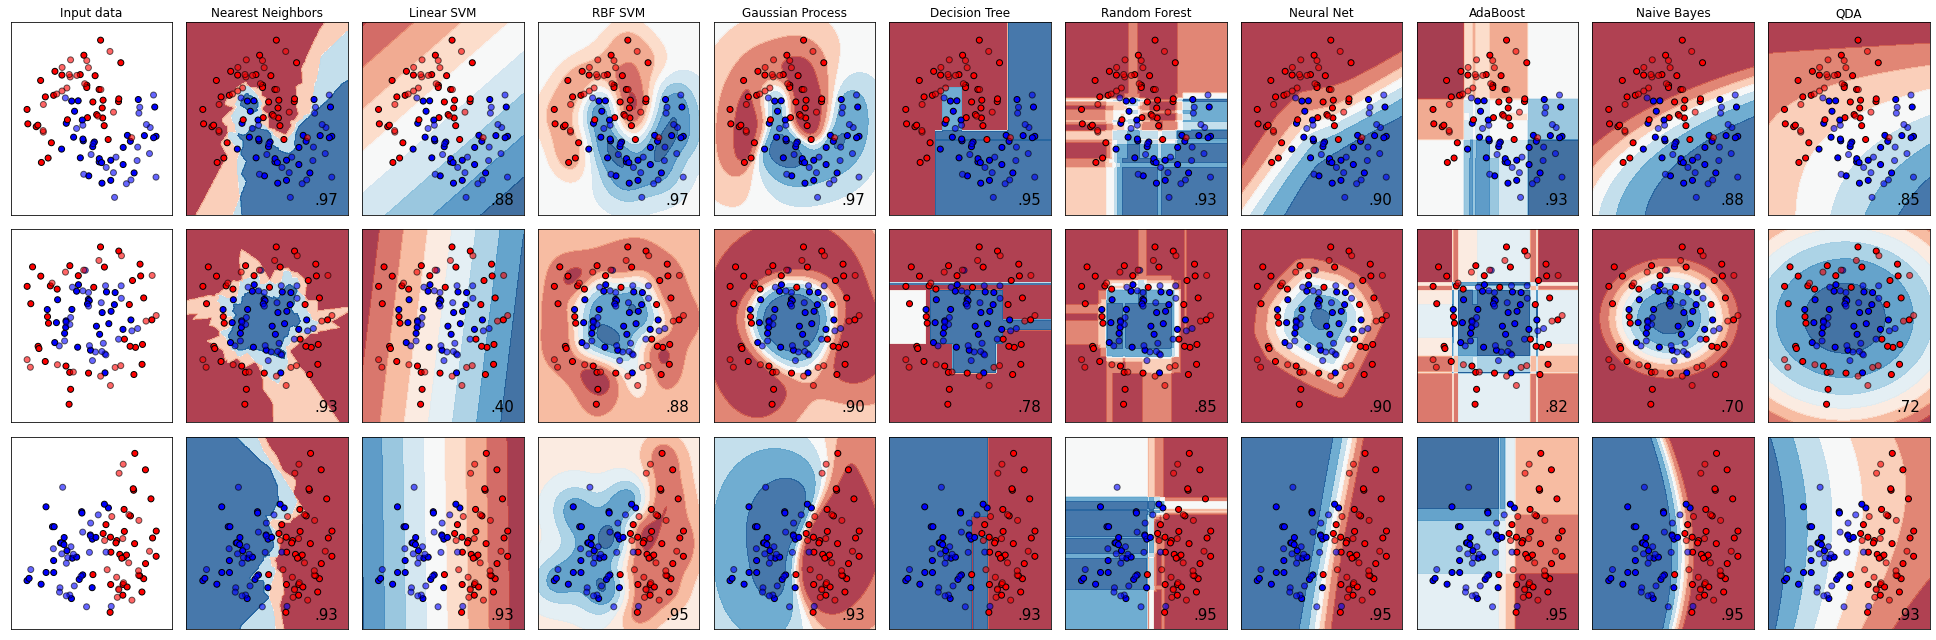

In [65]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

dataset = data['token_text']

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1, len(classifiers) + 1, i)
    ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()